In [66]:
# Social Media Content Analysis

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from datetime import timedelta

In [2]:
#create a list of categories

categories=['Food','Travel','Fashion','Fitness','Music','Culture','Family','Health']
data={'Date':pd.date_range('2021-01-01', periods=700),'Category':[random.choice(categories) for _ in range(700)]
,'Likes': np.random.randint(0, 10000, size=700)}

In [68]:
#Convert the data into a dataframe
df=pd.DataFrame(data)

In [4]:
df.head()

,Date,Category,Likes
0,2021-01-01,Travel,3045
1,2021-01-02,Family,4775
2,2021-01-03,Fitness,6214
3,2021-01-04,Family,8608
4,2021-01-05,Travel,8500


In [5]:
df.describe()

,Likes
count,700.00000
mean,5008.88000
std,2916.43563
min,6.00000
25%,2480.75000
50%,4998.50000
75%,7556.25000
max,9992.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      700 non-null    datetime64[ns]
 1   Category  700 non-null    object        
 2   Likes     700 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 13.8+ KB


In [7]:
#Count of each category in the dataframe
category_counts = df['Category'].value_counts()
print(category_counts)


Fashion    106
Food        97
Music       93
Travel      84
Health      84
Family      81
Fitness     81
Culture     74
Name: Category, dtype: int64


In [8]:
#Remove empty values
df.dropna(inplace=True)

In [9]:
#Returns a True if duplicates are found
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool


In [10]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [18]:
df['Date'].dtype

dtype('<M8[ns]')

In [20]:
#Convert date to datetime format
pd.to_datetime(df['Date'])

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
695   2022-11-27
696   2022-11-28
697   2022-11-29
698   2022-11-30
699   2022-12-01
Name: Date, Length: 700, dtype: datetime64[ns]

In [24]:
df['Category'].info

<bound method Series.info of 0       Travel
1       Family
2      Fitness
3       Family
4       Travel
        ...   
695    Fashion
696     Family
697    Fashion
698     Health
699     Family
Name: Category, Length: 700, dtype: object>

In [26]:
# Convert the Likes to a integer
df['Likes'].astype('int32').dtype

dtype('int32')

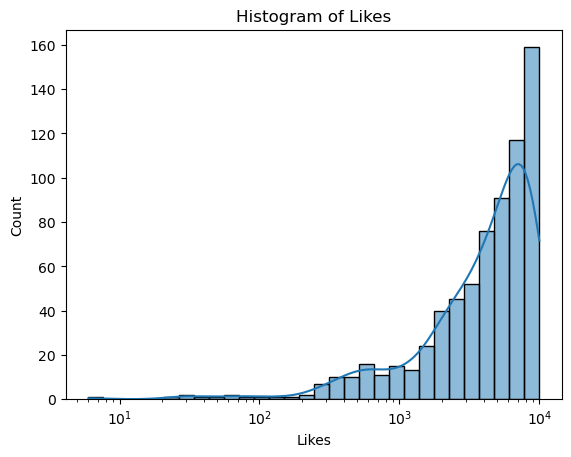

In [35]:
#histogram of the Likes
sns.histplot(df['Likes'],kde=True,log_scale=True)
plt.title('Histogram of Likes')
plt.show()

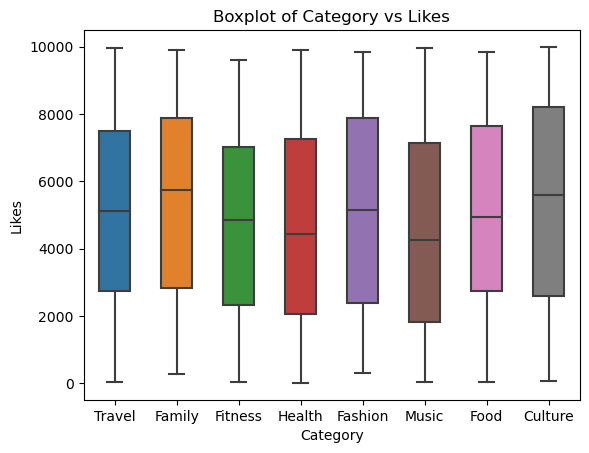

In [65]:
#Boxplot of Category and Likes
sns.boxplot(data=df, y="Likes", x="Category",width=.5,showfliers=True)
plt.title('Boxplot of Category vs Likes')
plt.show()

In [50]:
# Statistics 
df['Likes'].mean()

5008.88

In [57]:
#Mean of Likes by Category
df_groupby = df.groupby('Category')['Likes'].mean()
df_groupby 

Category
Culture    5383.189189
Family     5490.098765
Fashion    5125.886792
Fitness    4773.851852
Food       5090.247423
Health     4606.452381
Music      4565.817204
Travel     5093.083333
Name: Likes, dtype: float64